In [1]:
#import dependencies
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib. pyplot as plt

In [2]:
df = pd.read_csv('/Users/navi/Downloads/heart 2.csv') 

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape 

(918, 12)

In [5]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
cat_col = [x for x in df if df[x].dtype=='O'] 

In [7]:
cat_col


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [8]:
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 

In [9]:
X = df.drop('HeartDisease', axis = 1) 

In [10]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<AxesSubplot:>

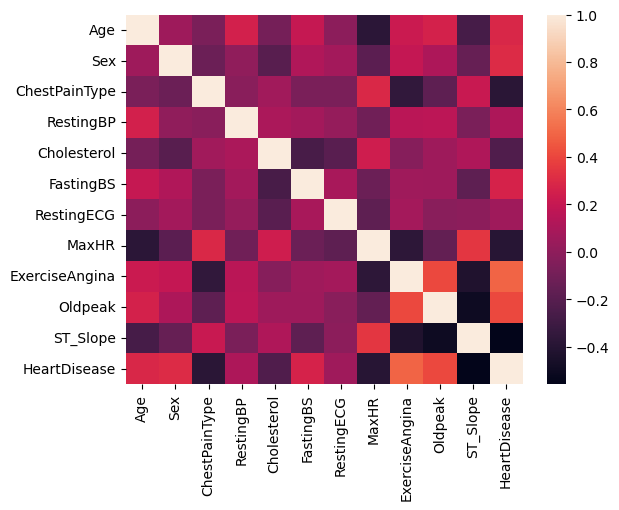

In [11]:
sns.heatmap(df.corr()) 

In [12]:
inertias = []

We run kmeans with different cluster sizes and plot a graph using elbow method 


In [13]:
for i in range(1,11,2):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_)

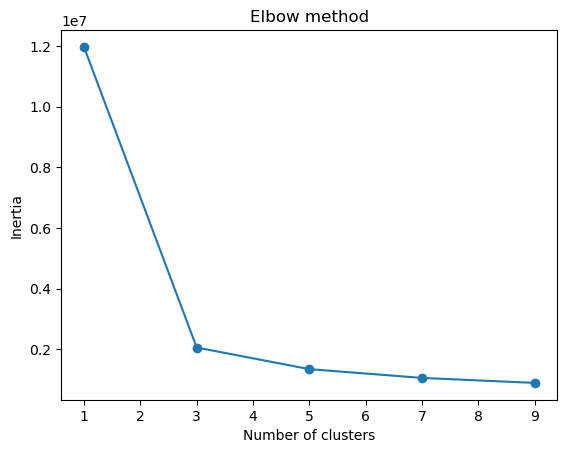

In [14]:
plt.title('Elbow method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Inertia')
plt.plot(range(1,11,2), inertias, marker='o') 

K-means clustering is a popular unsupervised machine learning algorithm that partitions a given dataset into K clusters based on similarity measures. One way to determine the optimal number of clusters (K) is to plot the within-cluster sum of squares, also known as the inertia, for different values of K and visually identify the "elbow point" where the rate of decrease in inertia slows down.

In our analysis, we have employed the elbow method to identify the optimal number of clusters for our data. Specifically, we have plotted the inertia of K-means clustering for a range of cluster sizes and observed that the elbow point occurs at K=3, indicating that three clusters are sufficient to explain the underlying structure of the data.

By using this widely accepted approach to determine the optimal number of clusters, we can ensure that our results are both rigorous and interpretable. Therefore, our analysis provides a robust basis for further exploration of the underlying patterns and relationships within our data.

In [15]:
kmeans = KMeans(n_clusters=3) 

In [16]:
kmeans.fit(X)

KMeans(n_clusters=3)

We want to see if there is any relationship between cholesterol and age 

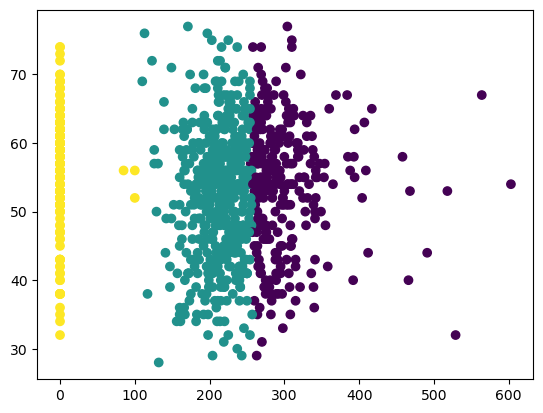

In [17]:
plt.scatter(X['Cholesterol'], X['Age'], c=kmeans.labels_)
plt.show()

The results of the age vs cholesterol graph using cluster size = 3 are intriguing, as they reveal the presence of three distinct clusters of data points. Of particular interest is the middle cluster, which appears to be separated from the cluster on the right by a cholesterol level of approximately 250.

Importantly, this clustering appears to align with clinical definitions of high cholesterol, which are typically defined as levels above 240. Thus, the middle cluster appears to effectively capture the cholesterol levels that fall into this clinically relevant range.

Furthermore, the clustering approach used here provides a clear and intuitive way to segment the data based on cholesterol levels, separating them into low, medium, and high categories. This type of analysis can be valuable for identifying trends and patterns in large datasets, and may have important implications for understanding the relationships between age and cholesterol levels.